# Automation StoryMap Editing

### Import Libraries

In [1]:
import json
import copy
import numpy as np
import pandas as pd

from arcgis.gis import GIS
from arcgis.apps.storymap import Image, StoryMap, Text, TextStyles, Map, Scales

gis = GIS(profile="your_online_profile")
gis

GIS @ https://geosaurus.maps.arcgis.com version:2024.1

In [2]:
file_path = r"C:\workspace\Content"

## Get the template StoryMap

https://storymaps.arcgis.com/stories/3864da69d9654c7e9d87b9b47d18e891
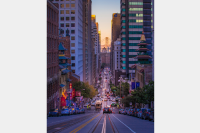

In [3]:
california = StoryMap("3864da69d9654c7e9d87b9b47d18e891")
california

### Understanding Content

In [4]:
california.content_list

['Storycover',
 'Navigation',
 Text: paragraph,
 Web Map,
 Text: h2,
 Timeline,
 Image Gallery,
 Sidecar,
 Web Map,
 'Credits']

##### A storymap is composed of different content types.
##### We've encapsulated this within our methods so you can edit the content and created automated changes.

## Reading and preparing our data

In [5]:
state = "Washington"

In [6]:
# created a csv with all my data
data = pd.read_csv(file_path + r"\Washington\WashingtonData.csv")
data

,For,Type,Content
0,cover,paragraph,Washington has been inhabited for thousands of...
1,cover,image,C:\workspace\Content\Washington\mountain.jpg
2,gallery,image,C:\workspace\Content\Washington\lake.jpg
3,gallery,image,C:\workspace\Content\Washington\seattlebw.jpg
4,gallery,image,C:\workspace\Content\Washington\lake2.jpg
5,gallery,image,C:\workspace\Content\Washington\coffee.jpg
6,gallery,image,C:\workspace\Content\Washington\mountain2.jpg
7,gallery,image,C:\workspace\Content\Washington\seattle2.jpg
8,gallery,image,C:\workspace\Content\Washington\seattle3.jpg
9,gallery,image,C:\workspace\Content\Washington\bridge.jpg


In [7]:
# create class from content and add to the DataFrame
classes = []

for index, row in data.iterrows():
    
    trow = row["Type"]
    crow = row["Content"]
    
    if trow == "paragraph":
        content = Text(text = crow, style = TextStyles.PARAGRAPH)
    elif trow == "subheading":
        content = Text(text = crow, style = TextStyles.SUBHEADING)
    elif trow == "image":
        content = Image(crow)
    else:
        content = None
    classes.append(content)

data["Class"] = classes

In [8]:
data

,For,Type,Content,Class
0,cover,paragraph,Washington has been inhabited for thousands of...,Text
1,cover,image,C:\workspace\Content\Washington\mountain.jpg,Image
2,gallery,image,C:\workspace\Content\Washington\lake.jpg,Image
3,gallery,image,C:\workspace\Content\Washington\seattlebw.jpg,Image
4,gallery,image,C:\workspace\Content\Washington\lake2.jpg,Image
5,gallery,image,C:\workspace\Content\Washington\coffee.jpg,Image
6,gallery,image,C:\workspace\Content\Washington\mountain2.jpg,Image
7,gallery,image,C:\workspace\Content\Washington\seattle2.jpg,Image
8,gallery,image,C:\workspace\Content\Washington\seattle3.jpg,Image
9,gallery,image,C:\workspace\Content\Washington\bridge.jpg,Image


In [9]:
# Each value of the class column represents a story content instance
data.iloc[0]["Class"]

Text

## Duplicating the template story

In [ ]:
new_item = gis.content.clone_items([gis.content.get("3864da69d9654c7e9d87b9b47d18e891")])
new_item

Already existent or Living Atlas items excluded from cloning. Check info-level logs for details.
Already existent or Living Atlas items excluded from cloning. Check info-level logs for details.


In [ ]:
type(new_item)

In [ ]:
# convert to an instance of storymap
story = StoryMap(new_item)
story

In [ ]:
# content and order has stayed the same
story.content_list

## Begin Editing
### First, the story cover

In [ ]:
cover_text = data.iloc[0]["Content"] #access the text in the first row of our dataframe
cover_image = Image(data.iloc[1]["Content"]) #create an instance of Image to be passed in

In [ ]:
# update the story cover
story.cover(title=state, summary = cover_text, image= cover_image)

### Editing the WebMap extent

In [ ]:
wmap = story.content_list[3]
wmap.map

### wmap

In [ ]:
# get the extent from our data
for index, row in data.iterrows():
    if row["Type"] == "extent":
        extent = json.loads(row["Content"]) #turn string to dict

extent

In [ ]:
# Use set_viewpoint method on the map instance
wmap.set_viewpoint(extent)

In [ ]:
wmap.set_viewpoint()

### Save to see our progress so far

In [ ]:
story.save()

### Update the timeline with our current data

In [ ]:
timeline = story.content_list[5]
timeline

In [ ]:
# get the data for the timeline from the DataFrame
timeline_data = data[data["For"] == "timeline"]
timeline_data

In [ ]:
timeline.properties

In [ ]:
# list of the events that will be edited
events = np.repeat([1,2,3,4,5,6,7,8],2)
idx = 0
for event in events:
    timeline.edit(content=timeline_data.iloc[idx]["Class"], event=event)
    idx = idx + 1

timeline.properties

### Update the gallery with our current data

In [ ]:
gallery_data = data[data["For"] == "gallery"]
gallery_data

In [ ]:
new_images = gallery_data["Class"].tolist()
new_images

In [ ]:
gallery = story.content_list[6]
gallery.properties

In [ ]:
# First, delete the current images so we only have the new ones once added
current = copy.copy(gallery.images)

for node in current:
    gallery.delete_image(node)
gallery.images

In [ ]:
gallery.add_images(new_images)
gallery.images

### Update the sidecar with our current data

In [ ]:
sidecar_data = data[data["For"] == "sidecar"]
sidecar_data

In [ ]:
extent

In [ ]:
texts = sidecar_data["Content"].tolist()
texts.pop(0) #remove extent
for text in texts:
    print(text)

In [ ]:
sidecar = story.content_list[7]
sidecar.properties

In [ ]:
sidecar.content_list

In [ ]:
idx = 0
for slide in sidecar.content_list:
    # update the webmaps
    webmap = slide[1]
    webmap.set_viewpoint(extent, Scales.STATE)
    
    # update the texts
    text = slide[0]
    text.text = texts[idx]
    idx += 1

sidecar.properties

In [ ]:
story.save()